### 1. Read and Clean the Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('portland.csv')

In [2]:
df.sample(10)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
319,MLS Listing,NaN,Condo/Co-op,841 SW Gaines St #1802,Portland,OR,97239,710000,1.0,1.5,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/841-S-Gaines...,RMLS,20103448,N,Y,45.496937,-122.669188
32,MLS Listing,NaN,Single Family Residential,1822 SE 77th Ave,Portland,OR,97215,399900,3.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/1822-SE-77th...,RMLS,20112205,N,Y,45.509781,-122.583496
99,MLS Listing,NaN,Single Family Residential,4927 SE Tenino Ct,Portland,OR,97206,499800,4.0,2.0,...,Active,July-26-2020 12:00 PM,July-26-2020 02:30 PM,http://www.redfin.com/OR/Portland/4927-SE-Teni...,RMLS,20030635,N,Y,45.465427,-122.611822
40,MLS Listing,NaN,Single Family Residential,2932 NE 88th Pl,Portland,OR,97220,544900,4.0,2.5,...,Active,July-26-2020 12:00 PM,July-26-2020 03:00 PM,http://www.redfin.com/OR/Portland/2932-NE-88th...,RMLS,20243212,N,Y,45.543775,-122.571717
287,MLS Listing,NaN,Single Family Residential,2107 N Vancouver Ave,Portland,OR,97227,925000,5.0,4.5,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/2107-N-Vanco...,RMLS,20520300,N,Y,45.538201,-122.668008
112,MLS Listing,NaN,Condo/Co-op,2928 NE Everett St,Portland,OR,97232,849900,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/2928-NE-Ever...,RMLS,20073215,N,Y,45.524845,-122.635286
165,MLS Listing,NaN,Single Family Residential,2405 SE 115th Ave,Portland,OR,97216,399900,3.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/2405-SE-115t...,RMLS,20446858,N,Y,45.505058,-122.545057
60,MLS Listing,NaN,Mobile/Manufactured Home,12450 SW Fischer Rd #141,Tigard,OR,97224,130000,4.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/12450-SW-Fis...,RMLS,20288769,N,Y,45.396232,-122.804770
277,MLS Listing,NaN,Single Family Residential,6219 N Detroit Ave,Portland,OR,97217,400000,3.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/6219-N-Detro...,RMLS,20509432,N,Y,45.567801,-122.688951
349,MLS Listing,NaN,Single Family Residential,6023 SW Pendleton Ct,Portland,OR,97221,639000,4.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/6023-SW-Pend...,RMLS,20465002,N,Y,45.482251,-122.738707


In [3]:
df.shape

(350, 27)

#### Drop unnescessary columns, transform the remaining column names to lower cases

In [4]:
df.drop(columns=['ADDRESS', 'CITY','STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'SALE TYPE',
                '$/SQUARE FEET', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',
                'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 
                'SOURCE', 'MLS#', 'LOCATION', 'SOLD DATE', 'STATUS', 'FAVORITE', 'INTERESTED'], inplace=True)

df.columns = [name.lower() for name in df.columns]

In [5]:
df.sample(10)

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
36,Single Family Residential,599000,4.0,1.5,1720.0,4791.0,1956.0,1,NaN,45.467936,-122.622322
345,Townhouse,899900,2.0,2.5,2969.0,2178.0,1990.0,3,NaN,45.532401,-122.700068
241,Single Family Residential,374900,2.0,1.0,768.0,4791.0,1950.0,2,NaN,45.462581,-122.687327
257,Single Family Residential,472500,2.0,2.0,2597.0,8712.0,1941.0,2,NaN,45.499513,-122.586080
255,Single Family Residential,399000,3.0,1.0,952.0,6098.0,1954.0,2,NaN,45.589315,-122.735785
269,Condo/Co-op,652900,3.0,3.0,2381.0,NaN,2015.0,2,327.0,45.546860,-122.763578
260,Condo/Co-op,4295000,3.0,3.5,3258.0,NaN,2016.0,2,1907.0,45.531953,-122.681762
48,Single Family Residential,369000,3.0,1.0,1080.0,7405.0,1955.0,1,NaN,45.536065,-122.529410
30,Single Family Residential,599995,5.0,2.5,2911.0,8276.0,2003.0,65,25.0,45.402091,-122.601540
292,Single Family Residential,1250000,2.0,1.0,1760.0,14810.0,1890.0,3,NaN,45.547071,-122.676948


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property type   350 non-null    object 
 1   price           350 non-null    int64  
 2   beds            349 non-null    float64
 3   baths           349 non-null    float64
 4   square feet     347 non-null    float64
 5   lot size        250 non-null    float64
 6   year built      349 non-null    float64
 7   days on market  350 non-null    int64  
 8   hoa/month       112 non-null    float64
 9   latitude        350 non-null    float64
 10  longitude       350 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 30.2+ KB


In [7]:
# Convert price to float
df['price'] = df['price'].astype('float')

#### Investigate missing data

In [8]:
# Create a list of dropped columns
drop_indices = []
df[df.beds.isnull()]

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
210,Vacant Land,275000.0,NaN,NaN,NaN,37897.0,NaN,2,NaN,45.531311,-122.748765


In [9]:
# This vacant land with 50% missing value, so I decide to drop it
drop_indices.append(210)

In [10]:
df[df['square feet'].isnull()]

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
210,Vacant Land,275000.0,NaN,NaN,NaN,37897.0,NaN,2,NaN,45.531311,-122.748765
256,Multi-Family (2-4 Unit),550000.0,2.0,2.0,NaN,NaN,1896.0,2,NaN,45.515175,-122.627506
310,Multi-Family (2-4 Unit),595000.0,16.0,14.0,NaN,NaN,1956.0,3,NaN,45.556707,-122.558654


In [11]:
# 256 and 310 has too many missing value, so I decide to drop it
drop_indices.extend([256, 310])

In [12]:
df[df['year built'].isnull()]

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
210,Vacant Land,275000.0,NaN,NaN,NaN,37897.0,NaN,2,NaN,45.531311,-122.748765


In [13]:
# Houses have NaN on lot size because they are condos/co-op, 
# so I will fill each of those NAN with 0
df[df['lot size'].isnull()].sample(5)

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
203,Condo/Co-op,195500.0,1.0,1.0,677.0,NaN,1972.0,2,243.0,45.467695,-122.717232
117,Condo/Co-op,254900.0,1.0,1.0,606.0,NaN,2020.0,1,140.0,45.569930,-122.685409
170,Condo/Co-op,550000.0,1.0,1.0,1050.0,NaN,2007.0,1,541.0,45.524935,-122.700255
39,Condo/Co-op,299900.0,1.0,1.0,825.0,NaN,1969.0,1,345.0,45.529322,-122.579343
215,Condo/Co-op,584900.0,3.0,2.5,1785.0,NaN,2017.0,2,100.0,45.558002,-122.677745


In [14]:
# Houses have NaN on hoa/month because their owners pay $0/month, 
# so I will fill each of those NAN with 0
df[df['hoa/month'].isnull()].sample(5)

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
274,Single Family Residential,549000.0,3.0,2.0,2110.0,4791.0,1955.0,2,NaN,45.551305,-122.584034
196,Single Family Residential,839000.0,5.0,3.0,2750.0,3920.0,1908.0,2,NaN,45.559585,-122.659665
98,Single Family Residential,639500.0,3.0,3.5,2076.0,2178.0,2012.0,1,NaN,45.560829,-122.658510
148,Single Family Residential,750000.0,4.0,2.5,3520.0,4791.0,2016.0,1,NaN,45.457334,-122.715312
259,Single Family Residential,335000.0,3.0,1.0,988.0,9583.0,1957.0,2,NaN,45.512101,-122.489991


In [15]:
# Fill NaNs in lot size and hoa/month with 0s
df.fillna(value={'hoa/month': 0, 'lot size': 0}, inplace=True)

# Drop all rows in drop_indices list
df.drop(labels=drop_indices, inplace=True)

#### Sanity Check of the Dataset

In [16]:
df.sample(15)

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
194,Single Family Residential,450000.0,3.0,2.0,1944.0,3920.0,1910.0,2,0.0,45.463771,-122.642893
120,Condo/Co-op,254900.0,1.0,1.0,618.0,0.0,2020.0,1,140.0,45.569930,-122.685409
59,Single Family Residential,332000.0,4.0,1.5,1024.0,5662.0,1954.0,1,0.0,45.491111,-122.570106
84,Single Family Residential,319727.0,3.0,2.0,1552.0,7405.0,1917.0,1,0.0,45.596535,-122.729206
285,Single Family Residential,875000.0,4.0,2.5,3356.0,21780.0,1959.0,2,0.0,45.500427,-122.783989
345,Townhouse,899900.0,2.0,2.5,2969.0,2178.0,1990.0,3,0.0,45.532401,-122.700068
238,Condo/Co-op,829000.0,2.0,2.0,1328.0,0.0,2008.0,2,721.0,45.539213,-122.689310
257,Single Family Residential,472500.0,2.0,2.0,2597.0,8712.0,1941.0,2,0.0,45.499513,-122.586080
146,Single Family Residential,579900.0,4.0,2.5,2602.0,4356.0,2008.0,1,0.0,45.460265,-122.684567
231,Single Family Residential,2799900.0,3.0,3.0,5182.0,8276.0,2002.0,2,0.0,45.514673,-122.695879


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property type   347 non-null    object 
 1   price           347 non-null    float64
 2   beds            347 non-null    float64
 3   baths           347 non-null    float64
 4   square feet     347 non-null    float64
 5   lot size        347 non-null    float64
 6   year built      347 non-null    float64
 7   days on market  347 non-null    int64  
 8   hoa/month       347 non-null    float64
 9   latitude        347 non-null    float64
 10  longitude       347 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 32.5+ KB


In [18]:
df.describe()

,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
count,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,5.785261e+05,3.020173,2.171470,2033.850144,5731.510086,1967.749280,3.654179,116.642651,45.511681,-122.668090
std,3.570839e+05,1.126223,0.997899,960.079889,6773.732635,35.720138,8.988512,257.231479,0.046466,0.084110
min,1.279000e+05,0.000000,1.000000,497.000000,0.000000,1886.000000,1.000000,0.000000,45.396232,-122.883283
25%,3.891700e+05,2.000000,1.500000,1267.000000,0.000000,1941.000000,1.000000,0.000000,45.478499,-122.713893
50%,5.250000e+05,3.000000,2.000000,1933.000000,4791.000000,1969.000000,2.000000,0.000000,45.514685,-122.673696
75%,6.749500e+05,4.000000,2.500000,2594.500000,7622.500000,2003.000000,2.000000,83.500000,45.545887,-122.609515
max,4.295000e+06,8.000000,12.000000,6637.000000,51400.000000,2020.000000,71.000000,1907.000000,45.621408,-122.460778


### 2. Exploratory Data Analysis of the Dataset

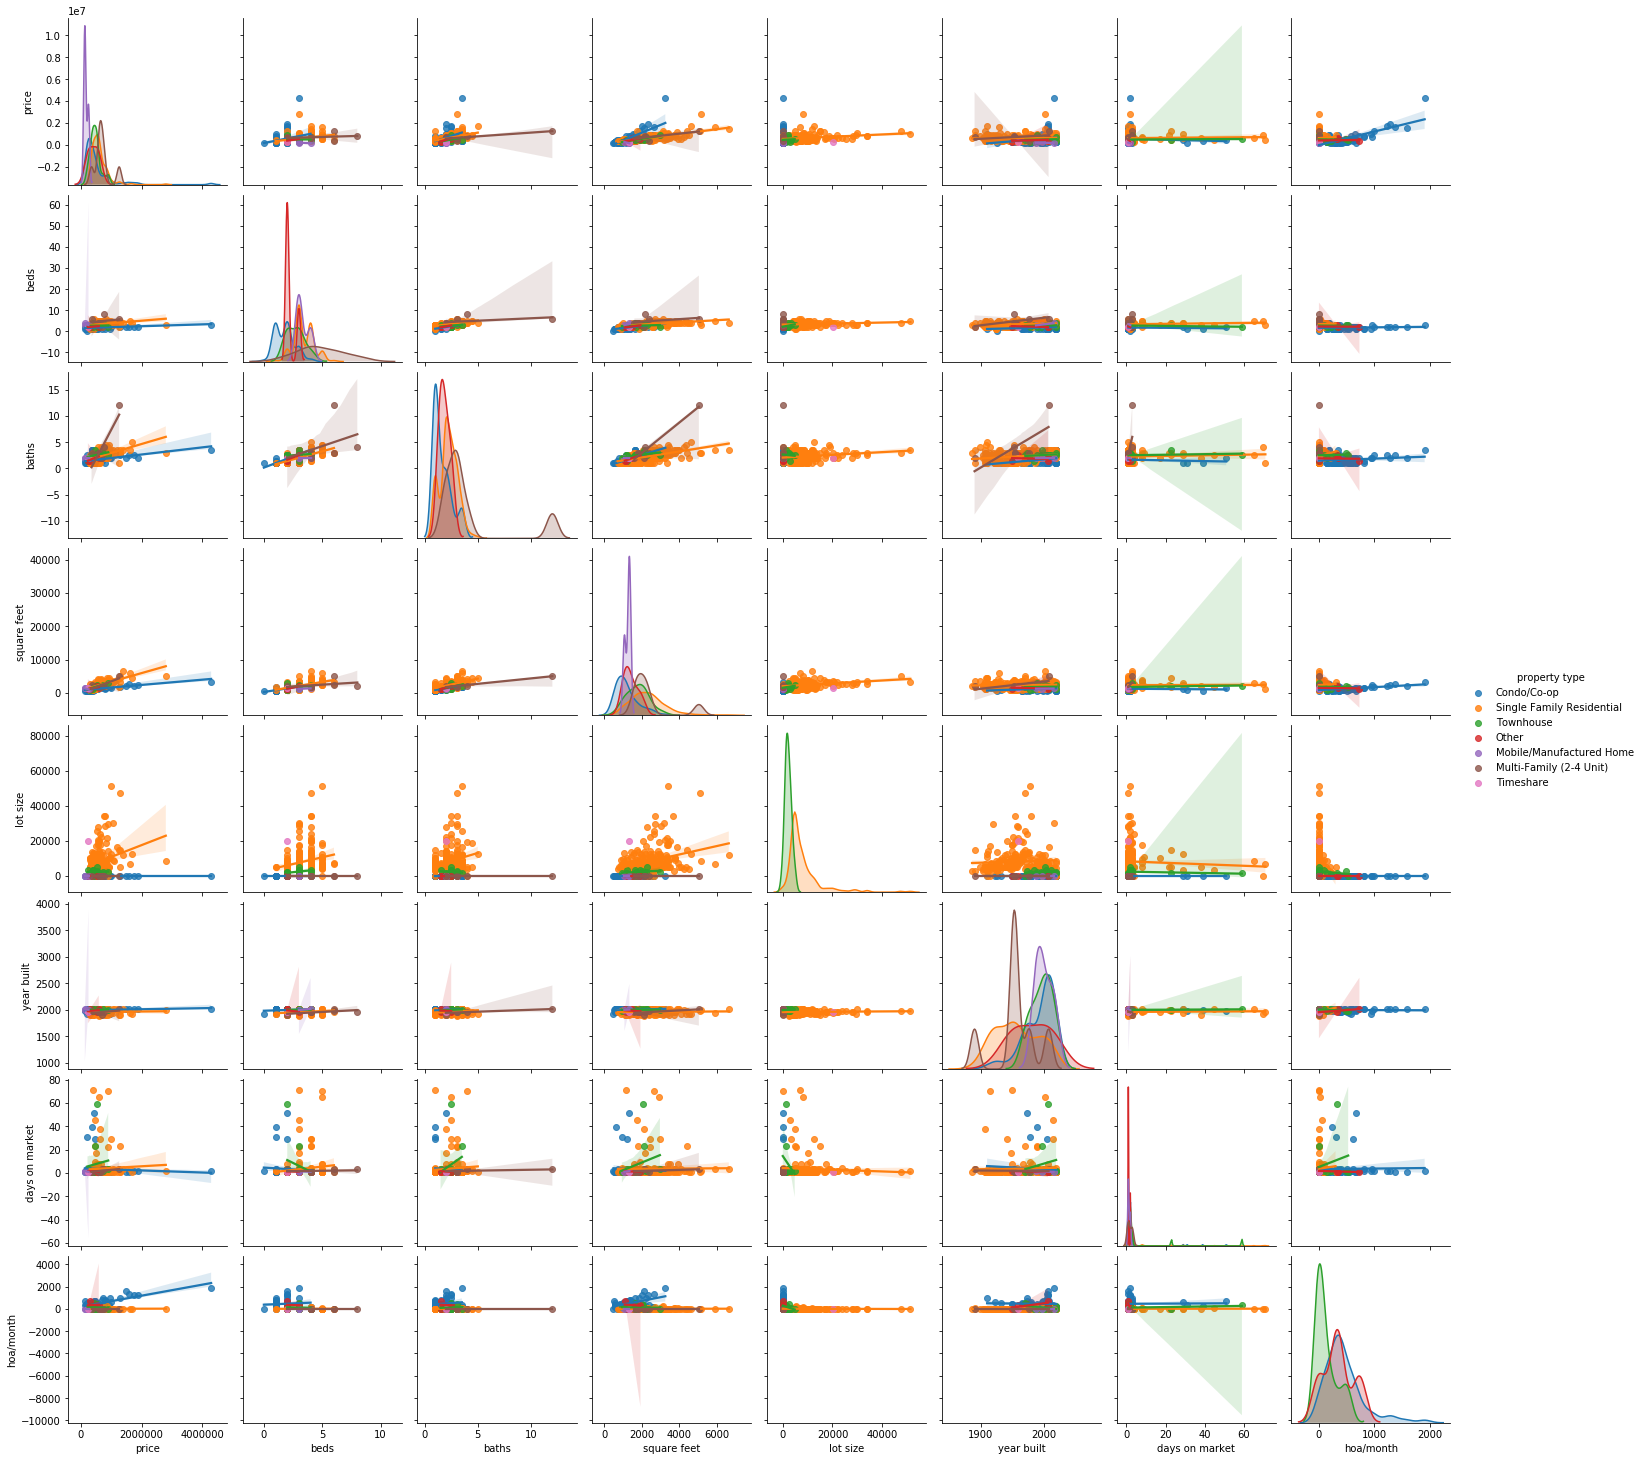

In [19]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
features = df.columns.to_list()[:-2]
sns.pairplot(df, vars=features[1:], kind='reg', hue='property type')

####  Note taking on features in the dataset
Single family residential which features 3-5 bedrooms and 1 to 3.5 bathrooms takes a major portion of the dataset.  

Most houses in which single family residential and condo/co-op dominates are priced under 1 million dollars.  

As expected, the prices are positively proportioned to the number of bedrooms and bathrooms. The most number of bedrooms is 8, and the most number of bathroom is 12. 

Majority of houses in the dataset has been listed just less than 4 days in the maket. The longest is 71 days.   

Most houses with larger lot sizes do not carry higher price tags than the one with smaller lot or vice versa.  

Houses with new year built do not translate to higher values as general sense.

Square feet is a good signal for price because we see the positive linear trend in the square feet vs. price relationshup.

In summary, there are 3 significant features in pricing a house in this dataset: square feet, number of bedrooms, number of bathrooms. I will dig in more the relationships between these 3 features in the next steps.

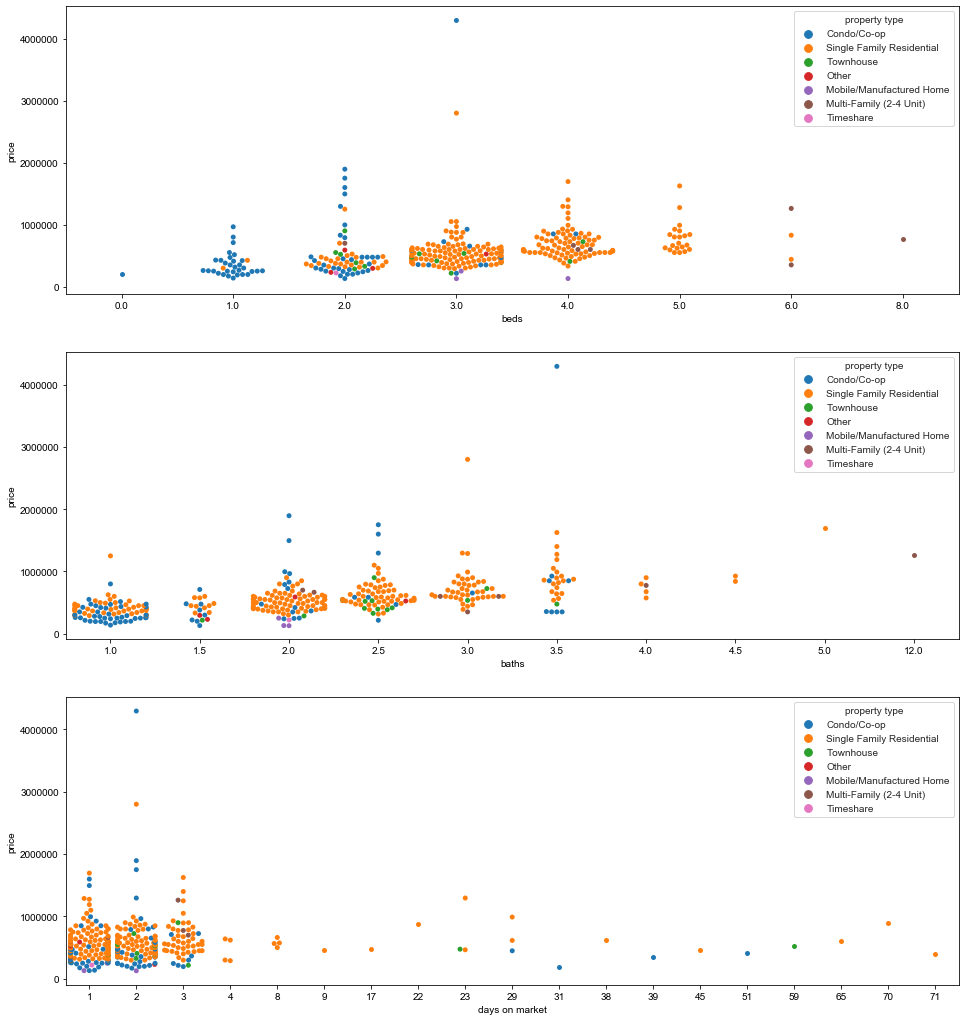

In [20]:
columns_a = ['beds', 'baths', 'days on market'] 
           
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

sns.set_style('whitegrid')
for k in range(3):
    sns.swarmplot(data=df, 
                  x=columns_a[k], 
                  y='price', 
                  hue='property type', 
                  ax=axes[k])

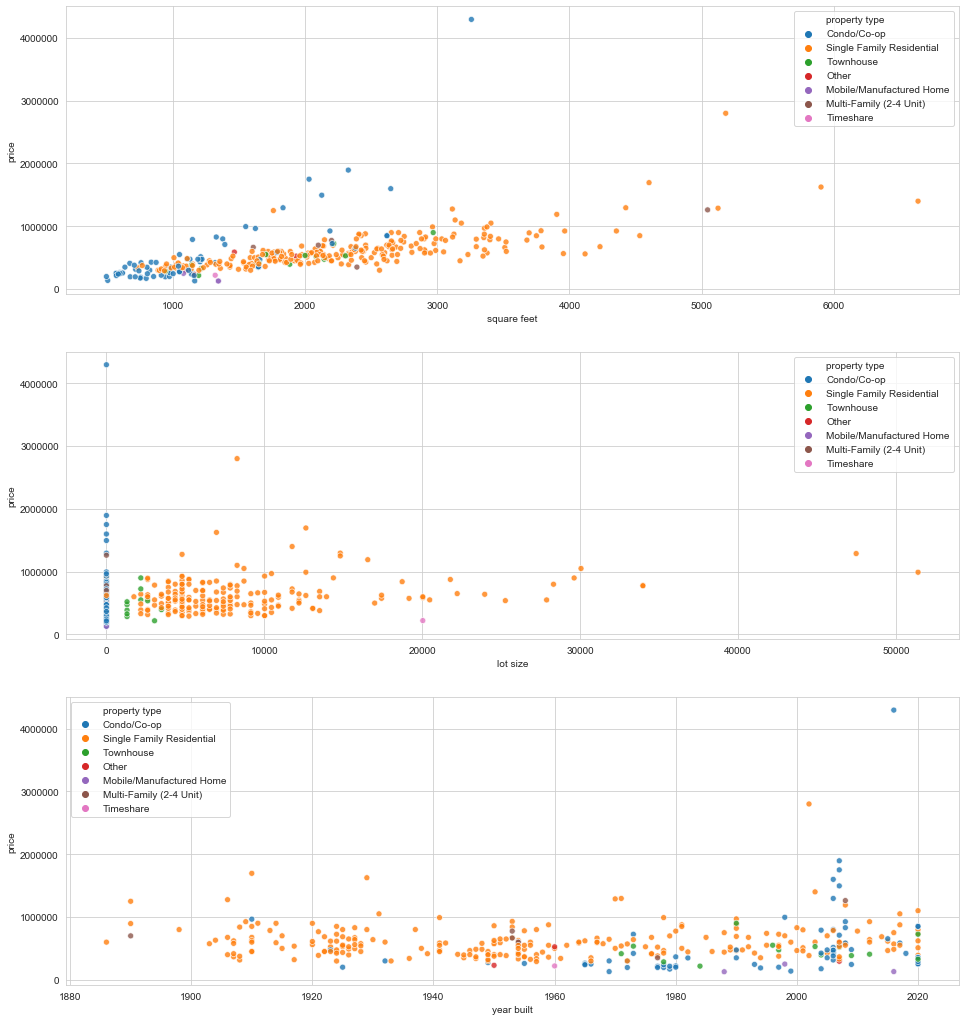

In [21]:
columns_b = ['square feet', 'lot size', 'year built'] 
           
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

sns.set_style('whitegrid')
for k in range(3):
    sns.scatterplot(data=df, 
                    x=columns_b[k], y='price', 
                    hue='property type', alpha=.8, ax=axes[k])

#### Survey the locations of houses
A red dot represents a house with price < 390,000.      

A blue dot represents a house with price in range (390,000 - 525,000).      

A dark green dot represents a house with price in range (525,000 - 675,000).  

A bright green dot represents a house with price > 675,000.    

The maps shows houses with various price ranges spread evenly in the region.  

##### Hence location (latitude and longitude) is not an important feature in this dataset.

In [22]:
# Use google maps api
import gmaps
gmaps.configure(api_key='**************************')
layout = {'width': '750px', 'height': '800px'}

# Set up Portland coordinate as the center of the map
portland = (45.5, -122.68)
fig = gmaps.figure(center=portland, zoom_level=11.6, layout=layout)

# Create price cutoffs 
price_1QT = .390 * 10**6
price_2QT = .525 * 10**6
price_3QT = .675 * 10**6


locations_1QT = df[ df.price < price_1QT][['latitude', 'longitude']]
locations_2QT = df[(df.price < price_2QT) & (df.price > price_1QT)][['latitude', 'longitude']]
locations_3QT = df[(df.price < price_3QT) & (df.price > price_2QT)][['latitude', 'longitude']]
locations_UPP = df[ df.price > price_3QT][['latitude', 'longitude']]

locations = [locations_1QT, locations_2QT, locations_3QT, locations_UPP]
colors = ['red', 'blue', 'green', '#00ffc5']

for k in range(4):
    fig.add_layer(gmaps.symbol_layer(locations[k], 
                                     fill_color=colors[k],
                                     stroke_color=colors[k],
                                     scale=2))
    
fig

Figure(layout=FigureLayout(height='800px', width='750px'))

#### In-depth analysis of the 4 important features for house pricing
1. Consolidate property type

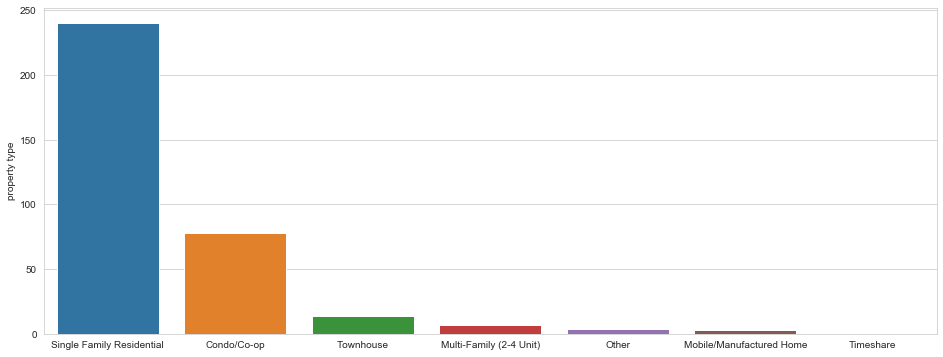

In [23]:
sns.barplot(df['property type'].value_counts().index, df['property type'].value_counts())
plt.gcf().set_size_inches(16, 6)

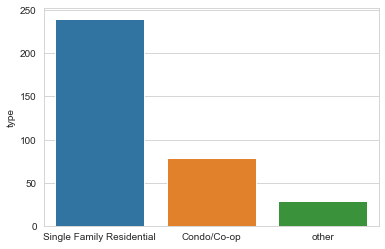

In [24]:
df['type'] = df['property type'].apply(lambda c: 
                                        c if c in ['Single Family Residential', 'Condo/Co-op']
                                          else 'other')

sns.barplot(df['type'].value_counts().index, df['type'].value_counts())

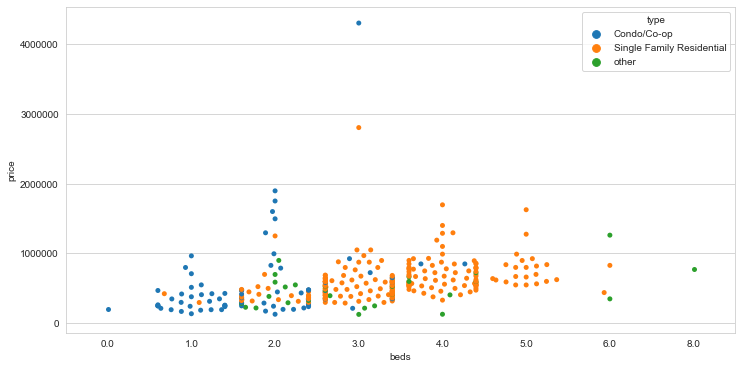

In [25]:
sns.swarmplot(data=df, x='beds', y='price', hue='type')
plt.gcf().set_size_inches(12, 6)

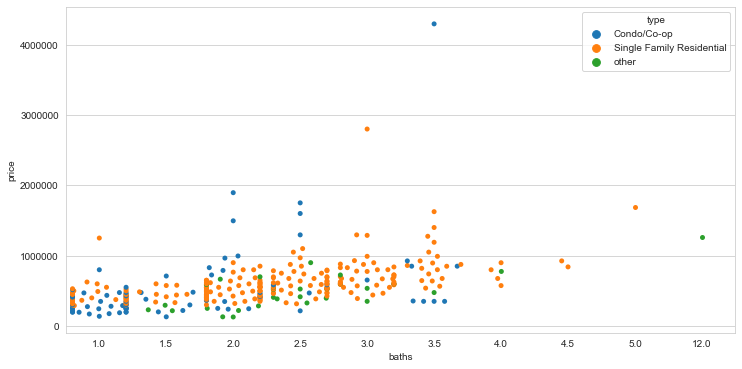

In [26]:
sns.swarmplot(data=df, x='baths', y='price', hue='type')
plt.gcf().set_size_inches(12, 6)

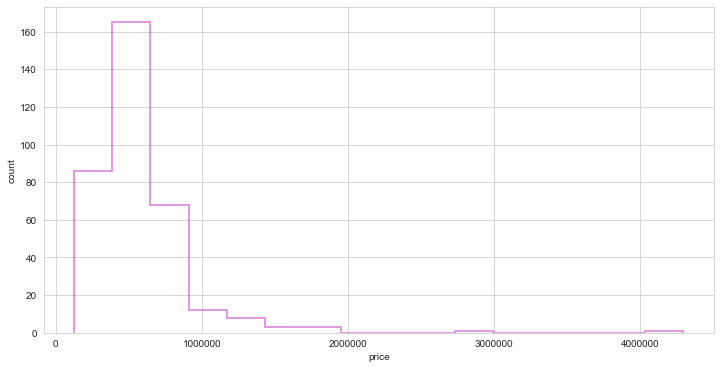

In [27]:
sns.distplot(df.price, bins=16, kde=False,
                      hist_kws={'histtype': 'step', 'lw': 2, 'color': 'm'})
plt.ylabel('count')
plt.gcf().set_size_inches(12, 6)

### 3. Modeling the Data

In [28]:
# One-hot encoding categorical feature type
new_types = ['single_residential', 'condo', 'other' ]
old_types =['Single Family Residential', 'Condo/Co-op', 'other']
for k in range(3):
    df[new_types[k]] = df['type'].apply(lambda c: 1 if c == old_types[k] else 0)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE

# Final selection of features for modeling 
features = ['single_residential', 'condo', 'other', 'square feet', 'beds', 'baths']

n_splits = 35
rmse_dict = {}

for k in range(3):
    rmse_list = []
    print('Verify the proportion of property type in training and testing sets:\n')
    for n in range(n_splits):
        # Split the dataset 
        X_train, X_test, y_train, y_test = TTS(df[features[:4 + k]], 
                                           df['price'], test_size=.2,
                                           stratify=df['type'], shuffle=True)
        
        # Compute then print the proprotion of property type in training and testing sets
        train_single = len(X_train[X_train.single_residential == 1])
        train_condo  = len(X_train[X_train.condo == 1])
        train_other  = len(X_train[X_train.other == 1])
        train_total  = train_single + train_condo + train_other
        
        test_single = len(X_test[X_test.single_residential == 1])
        test_condo  = len(X_test[X_test.condo == 1])
        test_other  = len(X_test[X_test.other == 1])
        test_total  = test_single + test_condo + test_other
                        
                           
        print('train:')
        print(round(train_single / train_total, 1),
              round(train_condo  / train_total, 1),
              round(train_other  / train_total, 1))
        
        print('test:')
        print(round(test_single / test_total, 1),
              round(test_condo  / test_total, 1),
              round(test_other  / test_total, 1))
        print('\n' + '* - ' * 10)
        
        # Instantiate the model
        lr = LinearRegression()

        # Train the model
        lr.fit(X_train, y_train)

        # Predict the testing label
        # X_test = X_test[X_test.other == 1]
        # y_test = y_test[X_test.index]
        y_pred = lr.predict(X_test)

        # Calculate the prediction score
        rmse = np.mean(MSE(y_test, y_pred) ** (.5))
        rmse_list.append(rmse)
        
    # Append the rmse_list into rmse_dict
    rmse_dict[features[3 + k]] = rmse_list

Verify the proportion of property type in training and testing sets:

train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * - * - * - * - * - 
train:
0.7 0.2 0.1
test:
0.7 0.2 0.1

* - * - * - * - * - * -

Text(0.5, 0, 'iterations')

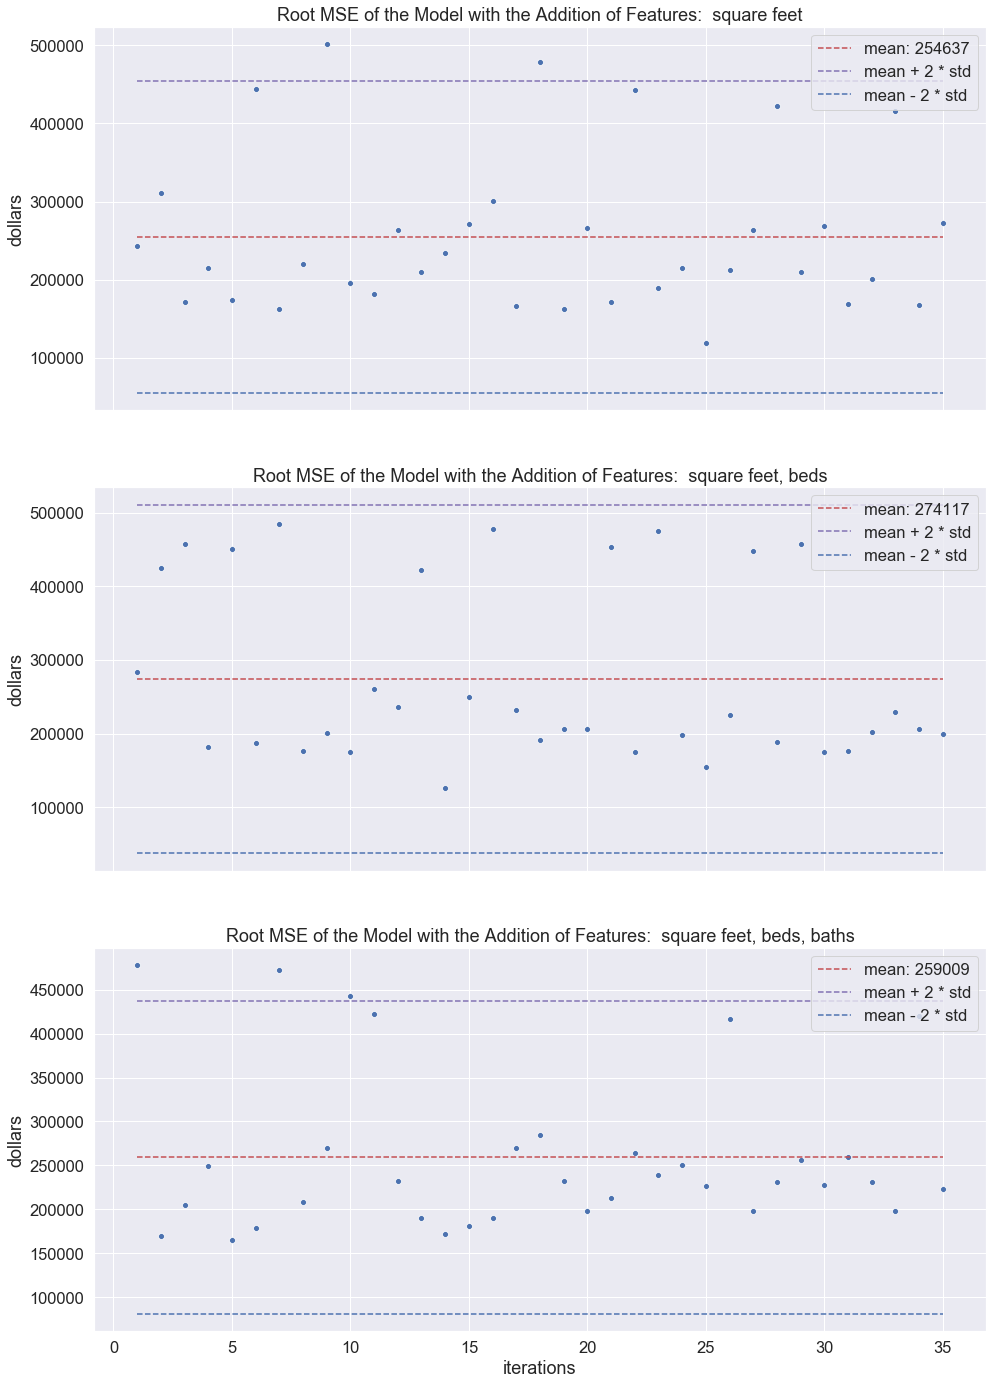

In [30]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(3, 1, figsize=(16, 24), sharex=True)
k, title = 0, 'Root MSE of the Model with the Addition of Features: '
for key, list_items in rmse_dict.items():
    sns.scatterplot(np.arange(n_splits) + 1, list_items, ax=axes[k])
    mean, std = np.mean(list_items), np.std(list_items)
    upper, lower = mean + 2 * std, mean - 2 * std
    ax = sns.lineplot([1, n_splits], [mean, mean], ax=axes[k], 
                      color='r', label='mean: {:.0f}'.format(mean))
    ax.lines[0].set_linestyle('--')
    ax = sns.lineplot([1, n_splits], [upper, upper], ax=axes[k], 
                      color='m', label='mean + 2 * std')
    ax.lines[1].set_linestyle('--')
    ax = sns.lineplot([1, n_splits], [lower, lower], ax=axes[k], 
                      color='b', label='mean - 2 * std')
    ax.lines[2].set_linestyle('--')
    ax.set_ylabel('dollars')
    title += ' ' + key + ','
    ax.set_title(title[:-1])
    ax.legend(loc='upper right')
    k += 1
    
plt.xlabel('iterations')   

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE

# Final selection of  ALL features for modeling 
features = ['single_residential', 'condo', 'other', 'square feet', 'baths', 'beds',
            'lot size', 'year built', 'days on market', 'hoa/month', 'latitude', 'longitude']

n_splits = 35
rmse_list = []
for n in range(n_splits):
   # Split the dataset 
    X_train, X_test, y_train, y_test = TTS(df[features[:4 + k]], 
                                           df['price'], test_size=.2,
                                           stratify=df['type'], shuffle=True)
    # Instantiate the model
    lr = LinearRegression()

    # Train the model
    lr.fit(X_train, y_train)

    # Predict the testing label
    y_pred = lr.predict(X_test)

    # Calculate the prediction score
    rmse = np.mean(MSE(y_test, y_pred) ** (.5))
    rmse_list.append(rmse)

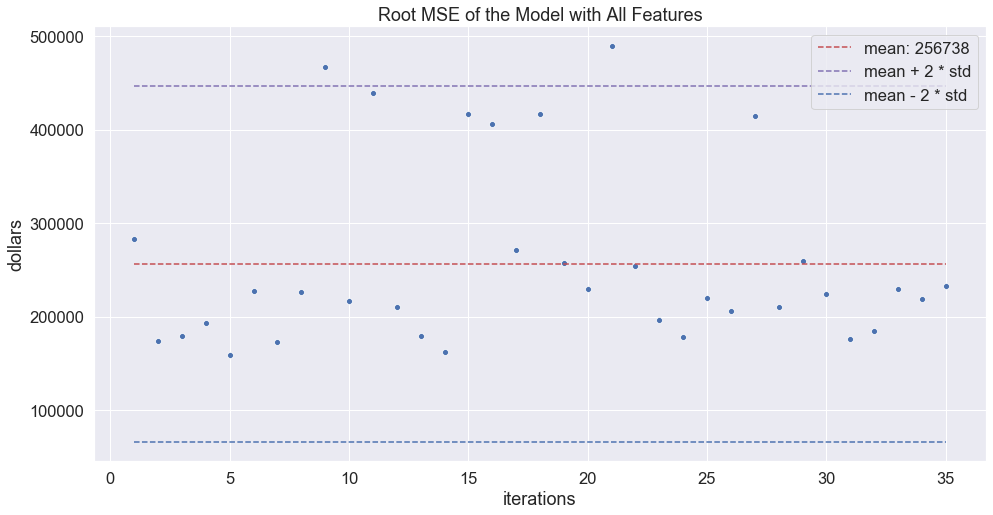

In [32]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 1, figsize=(16, 8), sharex=True)
title = 'Root MSE of the Model with All Features'

sns.scatterplot(np.arange(n_splits) + 1, rmse_list)
mean, std = np.mean(rmse_list),  np.std(rmse_list)
upper, lower = mean + 2 * std, mean - 2 * std
ax = sns.lineplot([1, n_splits], [mean, mean], 
                  color='r', label='mean: {:.0f}'.format(mean))
ax.lines[0].set_linestyle('--')
ax = sns.lineplot([1, n_splits], [upper, upper], 
                  color='m', label='mean + 2 * std')
ax.lines[1].set_linestyle('--')
ax = sns.lineplot([1, n_splits], [lower, lower], 
                   color='b', label='mean - 2 * std')
ax.lines[2].set_linestyle('--')
ax.set_xlabel('iterations')   
ax.set_ylabel('dollars')
ax.set_title(title)
ax.legend(loc='upper right')      